In [119]:

import numpy as np
import matplotlib.pyplot as plt

from src.helpers import*
from implementations import*


data_path_te = 'data/test.csv'
data_path_tr = 'data/train.csv'
data_path_te = 'data/sample-submission.csv'



y_tr, input_data_tr, ids_tr =load_csv_data(data_path_tr, sub_sample=False)


In [93]:
y_tr[y_tr ==-1]= 0

def normalize_dat(x):
    normalized = (x-np.mean(x, axis=0))/np.std(x, axis=0)
    return normalized

print(y_te)

[1. 1. 1. ... 1. 1. 1.]


In [120]:
print(input_data_te)

def predict(x, w):
    y_pred = np.empty_like(x @ w)
    y_pred[sigmoid(x @ w)  > 0.5] = 1
    y_pred[sigmoid(x @ w) <= 0.5] = 0
    return y_pred

[]


In [95]:
print(input_data_te)

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


def compute_f1_score(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_pred == y_true))
    fp = np.sum((y_pred == 1) & (y_pred != y_true))
    fn = np.sum((y_pred == 0) & (y_pred != y_true))
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*(precision*recall)/(precision+recall)
    return f1_score


[]


In [96]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold.
    
    Args:
        y:      shape=(N,)
        k_fold: K in K-fold, i.e. the fold num
        seed:   the random seed

    Returns:
        A 2D array of shape=(k_fold, N/k_fold) that indicates the data indices for each fold

    >>> build_k_indices(np.array([1., 2., 3., 4.]), 2, 1)
    array([[3, 2],
           [0, 1]])
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [118]:


tx_tr = normalize_dat(input_data_tr)
tx_te = normalize_dat(input_data_te)

input_data_te

array([], shape=(568238, 0), dtype=float64)

In [104]:
def cross_validation(y, x, k_indices, k, lambda_, max_iters, gamma):
    """return the loss of ridge regression for a fold corresponding to k_indices
    
    Args:
        y:          shape=(N,)
        x:          shape=(N,D)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """
    
    # get k'th subgroup in test, others in train: 
    x_test = x[k_indices[k], :]
    y_test = y[k_indices[k]]
    
    x_train = np.delete(x, k_indices[k], axis=0)
    y_train = np.delete(y, k_indices[k])

    # form data with polynomial degree:
    
    num_samples_train = len(y_train)
    num_samples_test = len(y_test)
    tx_train = np.c_[np.ones(num_samples_train), x_train]
    tx_test = np.c_[np.ones(num_samples_test), x_test]
    
    

    
    initial_w = np.ones(tx_train.shape[1])

    # ridge regression: 
    print(tx_train.shape)
    print(y_train.shape)
    print(initial_w.shape)
    w,loss_tr = reg_logistic_regression(y_train, tx_train, lambda_, initial_w, max_iters, gamma)
    
    acc = compute_accuracy(y_test, predict(tx_test, w))
    
    f1 = compute_f1_score(y_test, predict(tx_test, w))

    # calculate the loss for train and test data: 
    
    loss_te = compute_loss(y_test, tx_test, w, 'log')

    return loss_tr, loss_te, w, acc, f1
    
    


(225000, 31)
(225000,)
(31,)
GD iter. 0/99: loss=4.475473728010437, w0=0.9999927846105674, w1=1.0000004075963767
GD iter. 1/99: loss=4.475403215568873, w0=0.999985569019636, w1=1.0000008151226383
GD iter. 2/99: loss=4.4753327006215935, w0=0.9999783532271997, w1=1.0000012225787827
GD iter. 3/99: loss=4.4752621831765484, w0=0.9999711372332526, w1=1.0000016299648076
GD iter. 4/99: loss=4.475191663245682, w0=0.9999639210377885, w1=1.000002037280711
GD iter. 5/99: loss=4.475121140808542, w0=0.9999567046408014, w1=1.0000024445264908
GD iter. 6/99: loss=4.475050615877096, w0=0.9999494880422852, w1=1.0000028517021446
GD iter. 7/99: loss=4.474980088450867, w0=0.9999422712422339, w1=1.0000032588076706
GD iter. 8/99: loss=4.4749095585345655, w0=0.9999350542406413, w1=1.0000036658430667
GD iter. 9/99: loss=4.474839026116921, w0=0.9999278370375015, w1=1.0000040728083304
GD iter. 10/99: loss=4.474768491205013, w0=0.9999206196328084, w1=1.00000447970346
GD iter. 11/99: loss=4.474697953798819, w0=0.99

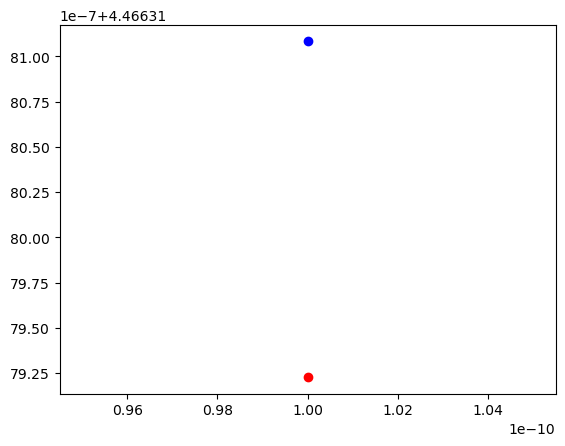

[0.99927961 1.00003636 0.9989018  0.99936969 0.9979869  0.99693027
 0.997372   0.99692511 1.00133343 0.99859147 0.99737267 0.99849069
 0.99905064 0.99692884 0.9999135  0.99959867 0.99976548 0.99835578
 0.9995783  0.99982242 0.99841324 0.99972998 0.9974947  0.99672255
 0.99736528 0.99743541 0.99743641 0.99692825 0.99692846 0.99692842
 0.99728839]


In [111]:


    # split data in k fold
seed = 1
k_fold = 10
lambdas = np.logspace(-10, -2,  1)
k_indices = build_k_indices(y_tr, k_fold, seed)
rmse_tr = np.zeros((lambdas.shape[0], 1))
rmse_te =  np.zeros((lambdas.shape[0], 1))
w_poss = np.zeros((lambdas.shape[0], tx_tr.shape[1]+1))
gamma = 0.0001
max_iters = 100
acc = np.zeros((lambdas.shape[0], 1))
f1 = np.zeros((lambdas.shape[0], 1))
    
    # cross validation over lambdas and degrees:
for j, lambda_ in enumerate(lambdas):
            
            loss_tr_k = []
            loss_te_k = []
            acc_k = []
            f1_k = []
            w_k = np.zeros((k_fold, tx_tr.shape[1]+1))
            i =0
            for k in range(k_fold):
                loss_tr, loss_te, w, acc_i, f1_i = cross_validation(y_tr, tx_tr, k_indices, k, lambda_, max_iters, gamma)
                loss_tr_k.append(loss_tr)
                loss_te_k.append(loss_te)
                acc_k.append(acc_i)
                f1_k.append(f1_i)
                print(acc_i)
                w_k[i, :] = w
                i=i+1
w_poss[j, :]  = np.mean(w_k, axis=0)
acc[j] = np.mean(acc_k)  
print(acc[j])     
f1[j] = np.mean(f1_k)
rmse_tr[j] = np.mean(loss_tr_k)
rmse_te[j] = np.mean(loss_te_k)
max_idx = np.unravel_index(f1.argmax(), f1.shape)

best_lambda = lambdas[max_idx[1]]
best_rmse = np.min(rmse_te) 
best_w = w_poss[max_idx[1], :]
best_acc = acc[max_idx[1]]
best_f1 = f1[max_idx[1]]
plt.plot(lambdas, rmse_tr, 'ro', lambdas, rmse_te, 'bo')
plt.show()
print(best_w)

In [114]:
best_acc

array([0.5999])

In [122]:
print("Model achieves {:.2f} accuracy and {:.2f} F1 score on test set.".format(best_acc[0], best_f1[0]))

y_test, x_test, ids_test = load_csv_data('data/test.csv', sub_sample=False)
x_test

Model achieves 0.60 accuracy and 0.47 F1 score on test set.


array([[-999.   ,   79.589,   23.916, ..., -999.   , -999.   ,    0.   ],
       [ 106.398,   67.49 ,   87.949, ..., -999.   , -999.   ,   47.575],
       [ 117.794,   56.226,   96.358, ..., -999.   , -999.   ,    0.   ],
       ...,
       [ 108.497,    9.837,   65.149, ..., -999.   , -999.   ,    0.   ],
       [  96.711,   20.006,   66.942, ..., -999.   , -999.   ,   30.863],
       [  92.373,   80.109,   77.619, ..., -999.   , -999.   ,    0.   ]])

In [123]:
y_pred = predict(x_test, best_w)
y_pred[y_pred == 0] = -1
create_csv_submission(ids_test, y_pred , 'submission.csv')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 31 is different from 30)

In [117]:
tx_te

array([], shape=(568238, 0), dtype=float64)